---
# Noom의 data분석가가 되어보자!
---

In [311]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
from datetime import datetime
import pandas as pd
import time

## 데이터 로딩하기

먼저 데이터를 로딩해오겠습니다. 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용합니다.

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습해주세요.

In [199]:
# noom.csv 파일을 읽어옵니다.
# 이 데이터는 사용자의 프로필(성별, 나이 등)과 구매 정보 등을 담고 있습니다.
# 또한 이 과정에서 구매 날짜(Purchased At)는 별도로 날짜 컬럼으로 해석할 수 있게 parse_dates 옵션에 추각합니다.
# 이 결과를 raw_data라는 이름의 변수에 할당합니다.
raw_data = pd.read_csv("noom_user.csv", parse_dates=["Purchased At"])

# 읽어온 데이터의 컬럼명을 출력합니다.
print(raw_data.columns)

# raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(raw_data.shape)

# .head()로 data 데이터의 상위 5개를 띄웁니다.
raw_data.head()

Index(['Access Code', 'Name', 'Gender', 'Age', 'Height', 'Initial Weight',
       'Lowest Weight', 'Target Weight', 'Product Name', 'Status', 'Price',
       'Purchased At', 'Payment Type', 'Channel'],
      dtype='object')
(10000, 14)


,Access Code,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Product Name,Status,Price,Purchased At,Payment Type,Channel
0,Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,눔 체중감량 프로그램,completed,112500,2017-04-14 19:03:29.976,Recurring,others
1,3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,눔 체중감량 프로그램,completed,44780,2017-05-23 20:53:54.368,Recurring,others
2,6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,눔 체중감량 프로그램 (천원 체험),completed,132000,2017-08-23 23:39:21.840,Recurring,facebook
3,EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,눔 체중감량 프로그램 (천원 체험),completed,112500,2017-08-28 20:18:22.824,Recurring,naver
4,1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,눔 체중감량 프로그램,completed,44780,2017-05-07 17:50:30.944,Recurring,facebook


컬럼에 대한 설명은 다음과 같습니다.

  * **Access Code** - 고객의 접근 코드, 쉽게 말해 고객을 식별할 수 있는 정보라고 보면 됩니다.
  * **Name** - 고객의 이름입니다. 한글로 되어있습니다.
  * **Gender** - 고객의 성별입니다. MALE과 FEMALE, 그리고 빈 값(NaN)으로 되어있습니다.
  * **Age** - 고객의 나이입니다.
  * **Height** - 고객의 키입니다. cm 기준입니다.
  * **Initial Weight** - 고객이 처음 눔 코치에 회원 가입 했을 당시의 몸무게입니다. kg 기준입니다.
  * **Lowest Weight** - 고객이 눔 코치를 이용하는 동안 측정한 몸무게 중, 가장 낮은 몸무게입니다. kg 기준입니다.
  * **Target Weight** - 고객이 눔 코치를 처음 회원 가입할 때 설정한 목표 몸무게입니다. kg 기준입니다.
  * **Product Name** - 눔 코치 프로그램의 상세 제품명입니다.
  * **Status** - 고객의 유료 서비스 결제 현황입니다. 결제중(complete), 결제 취소(cancelled), 환불 완료(refunded)로 되어있습니다.
  * **Price** - 서비스를 구입할 당시의 가격입니다. 원(₩) 기준입니다.
  * **Purchased At** - 서비스를 구입할 당시의 시간입니다.
  * **Payment Type** - 결제 방식입니다. 현재는 Recurring(구독형 결제)만 있습니다.
  * **Channel** - 서비스 구입 경로입니다. 구글, 페이스북, 네이버 등 다양한 경로를 통해 서비스를 구입하고 있습니다.
  


## 데이터 정리하기

데이터 분석을 하는데 있어서 가장 중요한 업무는 데이터를 정리(Data Cleaning)하는 일입니다. 현업에서 활동하는 데이터 분석가(Data Analyst)는 전체 업무 시간의 50% ~ 70%를 데이터를 정리하는데 사용합니다.

만일 파이썬과 판다스를 능숙하게 사용할 수 있다면 남들보다 빠르게 데이터를 정리하고 분석할 수 있습니다. 반면 파이썬과 판다스를 능숙하게 사용할 수 없다면, 남들보다 데이터를 정리하는데 시간이 오래 걸리게 되고 이는 곧 생산성의 차이로 이어집니다. 그러므로 빠른 시간 안에 효율적으로 데이터를 정리하는 스킬은 무엇보다도 중요합니다.

먼저 눔(Noom)의 데이터에서 정리가 필요한 몇몇 부분을 다뤄보겠습니다.

**1. 전체 컬럼에서 필요한 컬럼만 가져오세요.**

데이터를 분석할 때, 대부분의 경우 읽어온 컬럼 전체를 사용하는 경우는 없습니다. 그러므로 데이터를 분석하기 전에 사용하지 않는 컬럼을 사전에 정리해주면 더 편리하게 데이터를 분석할 수 있습니다.

이번 데이터 분석에서 필요한 컬럼은 다음과 같습니다.

 * ```Access Code```
 * ```Name```
 * ```Gender```
 * ```Age```
 * ```Height```
 * ```Initial Weight```
 * ```Lowest Weight```
 * ```Target Weight```
 * ```Status```
 * ```Price```
 * ```Purchased At```
 * ```Channel```

이 컬럼을 제외한 나머지 컬럼을 제거해주세요.

또한 위 컬럼에서 ```Access Code```를 인덱스(Index)로 지정해주세요. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>Name</th>
            <th>Gender</th>
            <th>Age</th>
            <th>Height</th>
            <th>Initial Weight</th>
            <th>Lowest Weight</th>
            <th>Target Weight</th>
            <th>Status</th>
            <th>Price</th>
            <th>Purchased At</th>
            <th>Channel</th>
        </tr>
        <tr>
            <th>Access Code</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Y9RY2VSI</th>
            <td>김승혜</td>
            <td>FEMALE</td>
            <td>25.0</td>
            <td>172.0</td>
            <td>66.9</td>
            <td>65.8</td>
            <td>55.000000</td>
            <td>completed</td>
            <td>112500</td>
            <td>2017-04-14 19:03:29.976</td>
            <td>others</td>
        </tr>
        <tr>
            <th>3GTN3S3B</th>
            <td>허승준</td>
            <td>MALE</td>
            <td>26.0</td>
            <td>176.0</td>
            <td>70.0</td>
            <td>NaN</td>
            <td>65.000000</td>
            <td>completed</td>
            <td>44780</td>
            <td>2017-05-23 20:53:54.368</td>
            <td>others</td>
        </tr>
        <tr>
            <th>6B0IG276</th>
            <td>이지민</td>
            <td>FEMALE</td>
            <td>23.0</td>
            <td>171.0</td>
            <td>98.0</td>
            <td>NaN</td>
            <td>91.140000</td>
            <td>completed</td>
            <td>132000</td>
            <td>2017-08-23 23:39:21.840</td>
            <td>facebook</td>
        </tr>
        <tr>
            <th>EMGRU2MO</th>
            <td>장설윤</td>
            <td>FEMALE</td>
            <td>20.0</td>
            <td>160.0</td>
            <td>70.7</td>
            <td>NaN</td>
            <td>53.000000</td>
            <td>completed</td>
            <td>112500</td>
            <td>2017-08-28 20:18:22.824</td>
            <td>naver</td>
        </tr>
        <tr>
            <th>1ELG96TX</th>
            <td>서성빈</td>
            <td>FEMALE</td>
            <td>28.0</td>
            <td>165.0</td>
            <td>55.5</td>
            <td>NaN</td>
            <td>51.615002</td>
            <td>completed</td>
            <td>44780</td>
            <td>2017-05-07 17:50:30.944</td>
            <td>facebook</td>
        </tr>
    </tbody>
</table>

In [200]:
data = raw_data [
[ 'Access Code', 
 'Name', 
 'Gender',
 'Age' ,
 "Height" , 
 'Initial Weight' , 
 'Lowest Weight', 
 'Target Weight' , 
 'Status' ,
 'Price' ,
 'Purchased At' ,
 'Channel' ]  
]

data.set_index("Access Code", inplace = True)
data.head()

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook


**2. 성별 컬럼을 정리해주세요.**

성별 컬럼(```Gender```)을 자세히 보시면, 크게 세 가지 종류가 있습니다.

In [201]:
# 성별(Gender) 컬럼에서 중복된 값을 제거합니다.
# 최종적으로 성별 컬럼의 종류가 나옵니다. (nan은 Not a Number, 즉 값이 없다는 의미입니다)
raw_data["Gender"].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

여기에서 남성과 여성을 굳이 대문자로 사용할 필요는 없을 것으로 보입니다. 가독성을 높이기 위해, 대문자로 되어있는 텍스트를 소문자로 변경해주세요. 가령 FEMALE은 female로, MALE은 male로 변경해주면 됩니다. 또한 원본을 훼손시키지 않기 위해, ```Gender``` 컬럼이 아닌 ```Gender(clean)```이라는 새로운 이름의 컬럼에 넣어주세요. 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Gender</th>
         <th>Gender(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>MALE</td>
         <td>male</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>FEMALE</td>
         <td>female</td>
      </tr>
   </tbody>
</table>

또한 ```Gender``` 컬럼을 정리한 뒤, 전체 가입자중 남성의 비율과 여성의 비율을 계산해주세요. 최종적으로는 **1) 여성 가입자가 8846명, 2) 남성 가입자가 1023명**이 되어야 합니다.

In [202]:
data ['Gender(clean)'] = data['Gender'].replace("MALE", 'male') .replace("FEMALE", 'female')
data.head()

data [['Name', 'Gender', 'Gender(clean)']].head()

C:\Users\ysj14\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Gender,Gender(clean)
Access Code,,,
Y9RY2VSI,김승혜,FEMALE,female
3GTN3S3B,허승준,MALE,male
6B0IG276,이지민,FEMALE,female
EMGRU2MO,장설윤,FEMALE,female
1ELG96TX,서성빈,FEMALE,female


In [203]:
# 전체 가입자중 남자와 여자수와 비율 계산

In [204]:
female = (data['Gender(clean)'] == 'female').sum()
male = (data['Gender(clean)'] == 'male').sum()

female_ratio = female/(female + male)
male_ratio = male / (female + male)

In [205]:
female_ratio

0.8963420812645658

In [206]:
male_ratio

0.10365791873543419

In [207]:
print(female)
print(male)

8846
1023


**3. 키 컬럼을 정리해주세요.**

키(```Height```) 컬럼도 성별 컬럼과 같이 정리가 필요해보입니다. 가령 전체 눔 사용자중 가장 키가 작은 사람을 찾는다면, 다음의 결과가 나옵니다.

In [208]:
# Height 컬럼에서 가장 작은(min) 값을 찾아와서 출력합니다.
raw_data["Height"].min()

-1.0

하지만 모두가 알다싶이 키가 -1 cm인 사람은 존재하지 않습니다. 추측컨데, 데이터를 저장하는 담당자가 편의를 위해 키를 입력하지 않은 사용자를 NaN이 아닌 -1.0으로 기입한 것 같습니다. 이 경우 데이터를 저장하는데는 편리하지만, 데이터를 분석할 경우 통계치가 잘못 나올 가능성이 있습니다. (가령 평균 키를 계산하면 실제 평균보다 -1.0씩 밀리겠죠)

그러므로 원활한 분석을 위해서는 키 컬럼을 정리해줄 필요가 있습니다. 키가 -1 cm인 사람은 NaN으로 데이터를 넣어주세요. 최종적으로는 다음의 결과가 나와야 합니다.

In [209]:
import numpy as np

data ['Height(clean)'] = data ['Height']
data.head()

data.loc[data['Height'] == -1 , 'Height(clean)' ] = np.nan
data.head()

data.loc[ data ['Height'] == -1, ['Name', 'Height', 'Height(clean)']].head()

C:\Users\ysj14\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ysj14\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Height</th>
         <th>Height(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>O4OWMJG7</th>
         <td>오세윤</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>H6EV5AXL</th>
         <td>박슬지</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>O1IAZS7A</th>
         <td>고솔윤</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>5NEQOWHW</th>
         <td>손초영</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>OFAXUNXD</th>
         <td>백채우</td>
         <td>-1.0</td>
         <td>NaN</td>
      </tr>
   </tbody>
</table>

또한 위 내용을 바탕으로 1) 최소/최대/평균 키를 구하고, 2) 남성/여성별 평균 키를 구해주세요.

가령 현재 키가 가장 작은 사용자는 106.0cm이며, 가장 큰 사용자는 203.2cm, 평균 키는 약 163.54cm 입니다. 남성의 평균 키와 여성의 평균 키는 다음과 같습니다.
<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Height(clean)</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>female</th>
         <td>162.116913</td>
      </tr>
      <tr>
         <th>male</th>
         <td>175.831965</td>
      </tr>
   </tbody>
</table>

In [210]:
# 최소/최대/평균 키 구하기

In [211]:
data['Height(clean)'].min()

106.0

In [212]:
data['Height(clean)'].max()

203.2

In [213]:
data['Height(clean)'].mean()

163.54161860276196

In [214]:
# 남성/여성별 평균 키 구하기

In [215]:
pd.pivot_table(data, index = 'Gender(clean)', values = 'Height(clean)')

,Height(clean)
Gender(clean),
female,162.116913
male,175.831965


**4. 나이 컬럼을 정리해주세요.**

3번과 비슷한 이유로, 나이(```Age```) 컬럼도 정리를 해야될 것 같습니다. 가령 전체 눔 사용자 중에서, 가장 나이가 어린 사람과 가장 나이가 많은 사람은 다음과 같습니다.

In [216]:
# 가장 나이가 어린 고객을 찾습니다.
# 결과는 0세라고 나오지만, 0세 사용자가 이 서비스를 사용할 가능성은 없습니다.
# 즉, 이 데이터는 잘못 기입된 데이터라고 판단할 수 있습니다.
raw_data["Age"].min()

0.0

In [217]:
# 현재까지의 데이터 확인
data.head()
print(data['Age'].min())

0.0


In [218]:
# 비슷하게 가장 나이가 많은 고객을 찾습니다.
# 결과는 173세라고 나오는데, 이 데이터도 잘못 기입되었다고 판단할 수 있습니다.
raw_data["Age"].max()

173.0

그러므로 이번에도 나이 컬럼을 정리해줄 필요가 있습니다. 다음의 규칙에 맞춰서 나이 컬럼을 정리해주세요.

  * 나이가 0인 데이터는 NaN으로 변경
  * 나이가 60세 이상인 데이터는 NaN으로 변경
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Age</th>
         <th>Age(clean)</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>9PTGVW4B</th>
         <td>강서연</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>ACV6D35S</th>
         <td>윤우성</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>Y0OK1FWA</th>
         <td>김서영</td>
         <td>85.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>WX34HGBL</th>
         <td>강채민</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>R9XCS81F</th>
         <td>최유신</td>
         <td>0.0</td>
         <td>NaN</td>
      </tr>
   </tbody>
</table>

In [219]:
# 나이가 0인 데이터는 NaN으로 변경
# 나이가 60세 이상인 데이터는 NaN으로 변경

In [220]:
## Age(clean) 컬럼을 새로 만들어서 0인 데이터나 60 이상인 경우 NaN으로 바꿔주기
zero = data['Age'] == 0
over60 = data['Age'] >= 60

data['Age(clean)'] = data['Age']
data.loc[zero, 'Age(clean)'] = np.nan
data.loc[over60, 'Age(clean)'] = np.nan

data.head()

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel,Gender(clean),Height(clean),Age(clean)
Access Code,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others,female,172.0,25.0
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others,male,176.0,26.0
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook,female,171.0,23.0
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver,female,160.0,20.0
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook,female,165.0,28.0


In [221]:
# 나이 칼럼 정리한 것 확인 

print(data['Age(clean)'].min())
print(data['Age(clean)'].max())

13.0
59.0


또한 위 내용을 바탕으로 1) 최소/최대/평균 나이를 구하고, 2) 남성/여성별 평균 나이를 구해주세요.

가령 현재 나이가 가장 어린 사용자는 13세이며, 반대로 가장 나이가 많은 사용자는 59세, 그리고 평균 나이는 약 27.38세 입니다. 남성의 평균 나이와 여성의 평균 나이는 다음과 같습니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Age(clean)</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>female</th>
         <td>27.172929</td>
      </tr>
      <tr>
         <th>male</th>
         <td>29.309127</td>
      </tr>
   </tbody>
</table>

In [222]:
print('최소나이', data['Age(clean)'].min())
print('최대나이', data['Age(clean)'].max())
print('평균나이', data['Age(clean)'].mean())

최소나이 13.0
최대나이 59.0
평균나이 27.39381024860477


In [223]:
#남성과 여성의 평균 나이

In [224]:
pd.pivot_table(data, index = 'Gender(clean)', values = 'Age(clean)')

,Age(clean)
Gender(clean),
female,27.172929
male,29.309127


### VIP 구하기

데이터를 다 정리했으면, 이제 본격적으로 데이터 분석(Data Analysis)을 해보겠습니다.

먼저 운영팀의 요청부터 살펴보겠습니다. 운영팀은 눔 코치를 이용하는 고객 중, 크게 다음의 조건에 해당하는 사람을 찾고 싶습니다.

1. 유료 사용자 중, 사용자 정보를 잘못 기입한 사람
2. 유료 사용자 중, 눔 코치의 VIP 사용자라고 간주할 수 있는 사람

1번 사용자의 경우, 유료 결제를 했으나 사용자 정보(나이, 키, 몸무게 등)가 잘못 기입되어있다면 담당 코치가 정확한 코칭을 제공해 줄 수 없는 문제가 있습니다. 그러므로 운영팀은 가능한 빠르게 정보를 잘못 기입한 고객을 찾아서 다시 기입해달라고 요청할 필요가 있습니다.

2번 사용자의 경우, 눔의 VIP 사용자로서 추가 혜택(ex: 서비스 무료 이용)을 제공해주는 것을 조건으로, 눔 코치를 대표하는 홍보 모델로서 활동해줄 것을 요청할 수 있습니다.

특히나 다이어트 관련 서비스는 VIP 사용자의 Before / After를 보여주는 것 만큼 좋은 홍보 수단은 없습니다. 그러므로 데이터 분석 팀에서 특정 조건(ex: 10kg 이상 감량 성공)에 만족하는 코어 사용자를 찾아내는 것을 중요합니다.

그러므로 눔의 데이터를 활용해, 1) 잘못된 정보를 기입한 사용자(invalid user)와, 눔 코치를 사용하여 큰 성과(ex: 몸무게 감량)를 본 사용자(VIP user)를 찾아보도록 하겠습니다.

먼저 데이터를 분석하기 전, 앞서 했던 것과 마찬가지로 전체 데이터에서 필요한 정보만 추출하도록 하겠습니다.

In [225]:
# data에서 필요한 컬럼만 가져와 파이썬 리스트로 만듭니다.
# 이 결과를 columns라는 이름의 변수로 저장합니다.
columns = [
    "Name",
    "Age(clean)",
    "Height(clean)",
    "Initial Weight",
    "Lowest Weight",
    "Target Weight",
    "Status"
] # 7개 칼럼

# 원본 데이터에서 필요한 컬럼만 가져옵니다.
# 이 결과를 weight_history라는 이름의 변수로 저장합니다.
weight_history = data[columns].copy()

# weight_history 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(weight_history.shape)

# .head()로 weight_history 데이터의 상위 5개를 띄웁니다.
weight_history.head()

(10000, 7)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed


**5. 주어진 컬럼으로 다음의 추가 정보를 계산해주세요.**

필요한 컬럼을 가져왔으면, 이번에는 잘못된 정보를 기입한 사용자와 VIP 사용자를 구분하기 위한 컬럼을 새로 추가하겠습니다. 

다음의 세 가지 정보를 담은 컬럼을 추가해주세요.

  1. ```Weight Loss(goal)``` - 목표 감량치. ```Initial Weight``` 컬럼과 ```Target Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  2. ```Weight Loss(current)``` - 최대 감량치. ```Initial Weight``` 컬럼과 ```Lowest Weight```의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
  3. 체질량지수(```BMI```) - 키(```Height(clean)```)와 체중(```Initial Weight```)으로 체지방의 양을 추정하는 공식입니다. 구체적인 공식은 다음과 같습니다.

$$
BMI = \frac{체중(kg)}{키(m) \times 키(m)}
$$

PS) 주의: BMI공식에서 사용하는 키는 센치미터(cm)가 아닌 미터(m)라는것에 주의해주세요.

최종적으로는 다음의 결과가 나와야합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Y9RY2VSI</th>
         <td>김승혜</td>
         <td>11.900000</td>
         <td>1.1</td>
         <td>22.613575</td>
      </tr>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
      </tr>
   </tbody>
</table>

In [226]:
# Weight Loss(goal) 컬럼추가하기

In [227]:
# 현재 데이터확인
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed


In [228]:
weight_history['Weight Loss(goal)'] = weight_history['Initial Weight'] - weight_history['Target Weight']
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal)
Access Code,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998


In [229]:
# Weight Loss(current) - 최대 감량치. Initial Weight 컬럼과 Lowest Weight의 차이를 나타냅니다. (마이너스가 나올 수 있습니다)
weight_history['Weight Loss(current)'] = weight_history['Initial Weight'] - weight_history['Lowest Weight']
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current)
Access Code,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN


In [230]:
# BMI (체중/ 키*키 in meter)
weight_history['BMI'] = weight_history['Initial Weight'] / (weight_history['Height(clean)']/100)**2
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,22.613575
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675


In [231]:
weight_history[['Name', 'Weight Loss(goal)', 'Weight Loss(current)', 'BMI']].head()

,Name,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,
Y9RY2VSI,김승혜,11.900000,1.1,22.613575
3GTN3S3B,허승준,5.000000,NaN,22.598140
6B0IG276,이지민,6.860000,NaN,33.514586
EMGRU2MO,장설윤,17.700000,NaN,27.617187
1ELG96TX,서성빈,3.884998,NaN,20.385675


이제 이 세 가지 정보만 있으면, 정보를 잘못 기입한 사용자(invalid user)와 VIP 사용자를 찾아낼 수 있습니다.

**6. 잘못된 정보를 기입한 사용자(invalid user)를 찾기**

이제 6번 데이터를 활용하여 잘못된 정보를 기입한 사용자를 찾아내겠습니다. 다음의 조건 중 하나라도 만족할 경우 잘못된 정보를 기입한 사용자라고 간주하며, Invalid라는 이름의 새로운 컬럼에 True라는 값을 집어넣습니다. (정 반대의 경우에는 False라고 집어넣습니다)

  1. 나이(```Age(clean)```), 키(```Height(clean)```)와 몸무게(```Initial Weight```, ```Lowest Weight```, ```Target Weight```) 중 어느 하나라도 NaN이 들어가 있는 경우. 
  1. 키를 너무 작게 기입했거나(140cm 미만)나, 정 반대로 너무 크게(200cm 초과) 기입한 사용자.
  1. BMI수치가 너무 낮거나(18.5 미만) 너무 높은 사용자. (30.0 초과)
  1. 목표 감량치(```Weight Loss(goal)```)가 마이너스인 경우. (보통 현재 체중보다 목표 체중을 낮게 설정합니다)
  
또한 이 문제를 너무 어렵게 생각하지 않고, 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)를 함수를 잘 활용하는 걸 추천드립니다. 그리고 값이 비어있는(NaN) 경우를 찾고 싶다면. 판다스(Pandas)의 [isnull](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.isnull.html)을 활용해주세요.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>Name</th>
            <th>Age(clean)</th>
            <th>Height(clean)</th>
            <th>Initial Weight</th>
            <th>Lowest Weight</th>
            <th>Target Weight</th>
            <th>Status</th>
            <th>Height(m)(clean)</th>
            <th>Weight Loss(goal)</th>
            <th>Weight Loss(current)</th>
            <th>BMI</th>
            <th>Height(Invalid)</th>
            <th>Age(Invalid)</th>
            <th>Weight(Invalid)</th>
            <th>Weight Loss(Invalid)</th>
            <th>BMI(Invalid)</th>
            <th>Invalid</th>
            <th>VIP</th>
        </tr>
        <tr>
            <th>Access Code</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>3GTN3S3B</th>
            <td>허승준</td>
            <td>26.0</td>
            <td>176.0</td>
            <td>70.0</td>
            <td>NaN</td>
            <td>65.000000</td>
            <td>completed</td>
            <td>1.76</td>
            <td>5.000000</td>
            <td>NaN</td>
            <td>22.598140</td>
            <td>False</td>
            <td>False</td>
            <td>True</td>
            <td>True</td>
            <td>False</td>
            <td>True</td>
            <td>False</td>
        </tr>
        <tr>
            <th>6B0IG276</th>
            <td>이지민</td>
            <td>23.0</td>
            <td>171.0</td>
            <td>98.0</td>
            <td>NaN</td>
            <td>91.140000</td>
            <td>completed</td>
            <td>1.71</td>
            <td>6.860000</td>
            <td>NaN</td>
            <td>33.514586</td>
            <td>False</td>
            <td>False</td>
            <td>True</td>
            <td>True</td>
            <td>True</td>
            <td>True</td>
            <td>False</td>
        </tr>
        <tr>
            <th>EMGRU2MO</th>
            <td>장설윤</td>
            <td>20.0</td>
            <td>160.0</td>
            <td>70.7</td>
            <td>NaN</td>
            <td>53.000000</td>
            <td>completed</td>
            <td>1.60</td>
            <td>17.700000</td>
            <td>NaN</td>
            <td>27.617187</td>
            <td>False</td>
            <td>False</td>
            <td>True</td>
            <td>True</td>
            <td>False</td>
            <td>True</td>
            <td>False</td>
        </tr>
        <tr>
            <th>1ELG96TX</th>
            <td>서성빈</td>
            <td>28.0</td>
            <td>165.0</td>
            <td>55.5</td>
            <td>NaN</td>
            <td>51.615002</td>
            <td>completed</td>
            <td>1.65</td>
            <td>3.884998</td>
            <td>NaN</td>
            <td>20.385675</td>
            <td>False</td>
            <td>False</td>
            <td>True</td>
            <td>True</td>
            <td>False</td>
            <td>True</td>
            <td>False</td>
        </tr>
        <tr>
            <th>ERJUS7LV</th>
            <td>장세현</td>
            <td>41.0</td>
            <td>160.0</td>
            <td>54.1</td>
            <td>NaN</td>
            <td>49.570000</td>
            <td>cancelled</td>
            <td>1.60</td>
            <td>4.530000</td>
            <td>NaN</td>
            <td>21.132812</td>
            <td>False</td>
            <td>False</td>
            <td>True</td>
            <td>True</td>
            <td>False</td>
            <td>True</td>
            <td>False</td>
        </tr>
    </tbody>
</table>

In [232]:
# 나이(Age(clean)), 키(Height(clean))와 몸무게(Initial Weight, Lowest Weight, Target Weight) 중 어느 하나라도 NaN이 들어가 있는 경우.
# 키를 너무 작게 기입했거나(140cm 미만)나, 정 반대로 너무 크게(200cm 초과) 기입한 사용자.
# BMI수치가 너무 낮거나(18.5 미만) 너무 높은 사용자. (30.0 초과)
# 목표 감량치(Weight Loss(goal))가 마이너스인 경우. (보통 현재 체중보다 목표 체중을 낮게 설정합니다)

In [233]:
weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,22.613575
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675


In [234]:
# weight_history['Height(Invalid)'] 만들기
weight_history['Height(Invalid)'] = (weight_history['Height(clean)'] < 140 ) | \
(weight_history['Height(clean)'] > 200 ) | (weight_history['Height(clean)'].isnull()) 

weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid)
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,22.613575,False
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140,False
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586,False
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187,False
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675,False


In [235]:
# weight_history['Age(Invalid)'] 만들기
weight_history['Age(Invalid)'] = weight_history['Age(clean)'].isnull()

weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid)
Access Code,,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,22.613575,False,False
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140,False,False
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586,False,False
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187,False,False
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675,False,False


In [236]:
#몸무게(Initial Weight, Lowest Weight, Target Weight) 중 어느 하나라도 NaN이 들어가 있는 경우.
# 키를 너무 작게 기입했거나(140cm 미만)나, 정 반대로 너무 크게(200cm 초과) 기입한 사용자.
# BMI수치가 너무 낮거나(18.5 미만) 너무 높은 사용자. (30.0 초과)
# 목표 감량치(Weight Loss(goal))가 마이너스인 경우. (보통 현재 체중보다 목표 체중을 낮게 설정합니다)

In [237]:
# weight_history['Weight(Invalid)'] 만들기
weight_history['Weight(Invalid)'] = (weight_history['Initial Weight'].isnull()) | \
(weight_history['Lowest Weight'].isnull()) | (weight_history['Target Weight'].isnull()) |\
(weight_history['Weight Loss(goal)'] < 0 ) | (weight_history['BMI'] < 18.5) | (weight_history['BMI'] > 30.0)

weight_history.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid)
Access Code,,,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,11.900000,1.1,22.613575,False,False,False
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140,False,False,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586,False,False,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187,False,False,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675,False,False,True


In [238]:
#  정보를 잘못 기입한 회원들만으로 구성된 DataFrame 출력
weight_history_wronginfo = weight_history[(weight_history['Height(Invalid)'] == True ) | \
(weight_history['Age(Invalid)'] == True )|\
(weight_history['Weight(Invalid)'] == True )]

weight_history_wronginfo.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,Height(Invalid),Age(Invalid),Weight(Invalid)
Access Code,,,,,,,,,,,,,
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,5.000000,NaN,22.598140,False,False,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,6.860000,NaN,33.514586,False,False,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,17.700000,NaN,27.617187,False,False,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,3.884998,NaN,20.385675,False,False,True
ERJUS7LV,장세현,41.0,160.0,54.1,NaN,49.570000,cancelled,4.530000,NaN,21.132812,False,False,True


In [239]:
weight_history_wronginfo['Name'].count()

5036

이제 허승준, 이지민님을 포함한 5036명의 사용자에게 운영팀은 사용자 정보를 올바르게 기입해달라는 별도의 공지 메시지를 보낼 것입니다.

차후에는 공지 메시지를 보낸 이후에도, 변함없이 정보를 올바르게 기입하지 않은 사용자를 찾아낼 수 있다면, 운영팀이 더 효율적으로 업무를 볼 수 있을 것입니다. (하지만 이는 수업 범위 외이므로 패스하겠습니다)

**7. VIP 사용자 체크하기**

이번에는 VIP 사용자를 찾아내겠습니다. 다음의 조건을 모두 만족할 경우 눔 코치의 VIP 고객으로 간주하며, ```VIP```라는 이름의 새로운 컬럼에 True라는 값을 집어넣습니다. (정 반대의 경우에는 False라고 집어넣습니다)

 
 1. 눔의 프로그램을 결제한 구매자. (```Status == "completed"```)
 1. 목표 감량치(```Weight Loss(goal)```), 최종 감량치(```Weight Loss(current)```), BMI 수치 모두 NaN이 아닌 값이 들어가 있는 사용자.
 1. 최종 감량치(```Weight Loss(current)```)가 10kg 이상.
 1. BMI 수치가 높은 사용자. (30.0 이상)
 1. 최종 감량치(```Weight Loss(current)```)가 목표 감량치(```Weight Loss(goal)```)보다 큰 경우. (다이어트에 성공한 사람)
 
마찬가지로 너무 어렵게 생각하지 않고, 판다스(Pandas)의 [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)를 함수를 잘 활용하는 걸 추천드립니다.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Height(clean)</th>
         <th>Initial Weight</th>
         <th>Lowest Weight</th>
         <th>Target Weight</th>
         <th>Status</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
         <th>VIP</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>3T1I8I8E</th>
         <td>임솔지</td>
         <td>158.0</td>
         <td>80.0137</td>
         <td>54.5</td>
         <td>77.745742</td>
         <td>completed</td>
         <td>2.267958</td>
         <td>25.5137</td>
         <td>32.051634</td>
         <td>True</td>
      </tr>
      <tr>
         <th>PJYKU9OW</th>
         <td>홍윤오</td>
         <td>174.0</td>
         <td>99.9000</td>
         <td>76.6</td>
         <td>84.000000</td>
         <td>completed</td>
         <td>15.900000</td>
         <td>23.3000</td>
         <td>32.996433</td>
         <td>True</td>
      </tr>
      <tr>
         <th>0EMTSGLJ</th>
         <td>류선정</td>
         <td>167.0</td>
         <td>86.0000</td>
         <td>73.2</td>
         <td>80.050003</td>
         <td>completed</td>
         <td>5.949997</td>
         <td>12.8000</td>
         <td>30.836531</td>
         <td>True</td>
      </tr>
      <tr>
         <th>FBEAIFW0</th>
         <td>서서원</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>8QQV2YDW</th>
         <td>홍서율</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>99KOLRU8</th>
         <td>고서연</td>
         <td>162.0</td>
         <td>106.0000</td>
         <td>95.2</td>
         <td>98.580000</td>
         <td>completed</td>
         <td>7.420000</td>
         <td>10.8000</td>
         <td>40.390184</td>
         <td>True</td>
      </tr>
      <tr>
         <th>IBOWZ9WZ</th>
         <td>손서애</td>
         <td>166.0</td>
         <td>83.0000</td>
         <td>66.1</td>
         <td>73.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>16.9000</td>
         <td>30.120482</td>
         <td>True</td>
      </tr>
      <tr>
         <th>6EH2LGR5</th>
         <td>문세영</td>
         <td>164.0</td>
         <td>88.8000</td>
         <td>56.3</td>
         <td>82.584003</td>
         <td>completed</td>
         <td>6.215997</td>
         <td>32.5000</td>
         <td>33.016062</td>
         <td>True</td>
      </tr>
      <tr>
         <th>QQLYGTWD</th>
         <td>황수윤</td>
         <td>165.0</td>
         <td>105.0000</td>
         <td>87.8</td>
         <td>97.650000</td>
         <td>completed</td>
         <td>7.350000</td>
         <td>17.2000</td>
         <td>38.567493</td>
         <td>True</td>
      </tr>
      <tr>
         <th>4Z1WB3UZ</th>
         <td>허지예</td>
         <td>162.0</td>
         <td>106.0000</td>
         <td>95.2</td>
         <td>98.580000</td>
         <td>completed</td>
         <td>7.420000</td>
         <td>10.8000</td>
         <td>40.390184</td>
         <td>True</td>
      </tr>
      <tr>
         <th>2YAKET8R</th>
         <td>서승희</td>
         <td>164.0</td>
         <td>99.8000</td>
         <td>86.4</td>
         <td>92.814000</td>
         <td>completed</td>
         <td>6.986000</td>
         <td>13.4000</td>
         <td>37.105889</td>
         <td>True</td>
      </tr>
      <tr>
         <th>LDPPDM0M</th>
         <td>윤지안</td>
         <td>168.0</td>
         <td>93.1000</td>
         <td>65.5</td>
         <td>69.000000</td>
         <td>completed</td>
         <td>24.100000</td>
         <td>27.6000</td>
         <td>32.986111</td>
         <td>True</td>
      </tr>
      <tr>
         <th>PKHJWII8</th>
         <td>정선영</td>
         <td>170.0</td>
         <td>95.0000</td>
         <td>75.7</td>
         <td>85.000000</td>
         <td>completed</td>
         <td>10.000000</td>
         <td>19.3000</td>
         <td>32.871972</td>
         <td>True</td>
      </tr>
      <tr>
         <th>3B3WQA4A</th>
         <td>홍슬비</td>
         <td>158.0</td>
         <td>84.0000</td>
         <td>69.3</td>
         <td>75.000000</td>
         <td>completed</td>
         <td>9.000000</td>
         <td>14.7000</td>
         <td>33.648454</td>
         <td>True</td>
      </tr>
      <tr>
         <th>SDY4VS0P</th>
         <td>오채현</td>
         <td>170.0</td>
         <td>103.1000</td>
         <td>57.1</td>
         <td>100.099998</td>
         <td>completed</td>
         <td>3.000001</td>
         <td>46.0000</td>
         <td>35.674740</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

In [240]:
# Write your code! 

# 기존에 만들어 놓은 weight_history라는 Data set을 이용해서 vip_list를 추출하기 
# 1. vip_list라는 새로운 data set만들기

vip_list = weight_history[['Name','Height(clean)','Initial Weight', 'Target Weight','Status',\
                           'Weight Loss(goal)', 'Weight Loss(current)', 'BMI']]

In [241]:
# vip_list 출력
vip_list.head()

,Name,Height(clean),Initial Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,,,,,
Y9RY2VSI,김승혜,172.0,66.9,55.000000,completed,11.900000,1.1,22.613575
3GTN3S3B,허승준,176.0,70.0,65.000000,completed,5.000000,NaN,22.598140
6B0IG276,이지민,171.0,98.0,91.140000,completed,6.860000,NaN,33.514586
EMGRU2MO,장설윤,160.0,70.7,53.000000,completed,17.700000,NaN,27.617187
1ELG96TX,서성빈,165.0,55.5,51.615002,completed,3.884998,NaN,20.385675


In [242]:
# vip를 선정하여 VIP인지 여부를 나타내는 column을 추가하기
# vip 선정 기준 (모두 만족)


 1. 눔의 프로그램을 결제한 구매자. (```Status == "completed"```)
 1. 목표 감량치(```Weight Loss(goal)```), 최종 감량치(```Weight Loss(current)```), BMI 수치 모두 NaN이 아닌 값이 들어가 있는 사용자.
 1. 최종 감량치(```Weight Loss(current)```)가 10kg 이상.
 1. BMI 수치가 높은 사용자. (30.0 이상)
 1. 최종 감량치(```Weight Loss(current)```)가 목표 감량치(```Weight Loss(goal)```)보다 큰 경우. (다이어트에 성공한 사람)

In [243]:
status = (vip_list['Status'] == 'completed')
goal = (vip_list['Weight Loss(goal)'].notnull())
current = (vip_list['Weight Loss(current)'].notnull())
bmi = (vip_list['BMI'].notnull())
loss = (vip_list['Weight Loss(current)'] >= 10)
highbmi = (vip_list['BMI']>= 30.0)
successful = (vip_list['Weight Loss(current)']) > (vip_list['Weight Loss(goal)'])

In [244]:
vip_list['VIP'] = status & goal & current & bmi & loss & highbmi & successful

C:\Users\ysj14\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
vip_list.head()

,Name,Height(clean),Initial Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,VIP
Access Code,,,,,,,,,
Y9RY2VSI,김승혜,172.0,66.9,55.000000,completed,11.900000,1.1,22.613575,False
3GTN3S3B,허승준,176.0,70.0,65.000000,completed,5.000000,NaN,22.598140,False
6B0IG276,이지민,171.0,98.0,91.140000,completed,6.860000,NaN,33.514586,False
EMGRU2MO,장설윤,160.0,70.7,53.000000,completed,17.700000,NaN,27.617187,False
1ELG96TX,서성빈,165.0,55.5,51.615002,completed,3.884998,NaN,20.385675,False


In [246]:
# vip인 사용자들 출력
vip = vip_list[vip_list['VIP'] == True]

In [247]:
vip.head()

,Name,Height(clean),Initial Weight,Target Weight,Status,Weight Loss(goal),Weight Loss(current),BMI,VIP
Access Code,,,,,,,,,
3T1I8I8E,임솔지,158.0,80.0137,77.745742,completed,2.267958,25.5137,32.051634,True
PJYKU9OW,홍윤오,174.0,99.9000,84.000000,completed,15.900000,23.3000,32.996433,True
0EMTSGLJ,류선정,167.0,86.0000,80.050003,completed,5.949997,12.8000,30.836531,True
FBEAIFW0,서서원,170.0,95.0000,85.000000,completed,10.000000,19.3000,32.871972,True
8QQV2YDW,홍서율,170.0,95.0000,85.000000,completed,10.000000,19.3000,32.871972,True


In [248]:
vip['Name'].count()

15

분석 결과 총 15명(임솔지, 홍윤오, 류선정, 서서원, 홍서율, 고서연, 손서애, 문세영, 황수윤, 허지예, 서승희, 윤지안, 정선영, 홍슬비, 오채현)의 VIP 사용자를 발견했습니다. 홍보팀에서는 이 사용자들에게 개별적으로 컨택할 것이며, 눔 코치를 더 만족스럽게 이용할 수 있는 각종 혜택을 조건으로, 눔 코치의 홍보모델로 활동할 것을 제안할 것입니다.

이 사용자들이 제안을 거절할 경우를 대비해서, 조건을 완화한 VIP 사용자(가령 최종 감량치(```Weight Loss(current)```)가 10kg -> 7kg 이상)를 찾야아 할 수도 있을 것입니다. (하지만 마찬가지로 이는 수업 범위 외이므로 패스하겠습니다)

## 결제 체크

이번에는 마케팅팀의 요청을 살펴보도록 하겠습니다.

눔 코치와 같은 서비스에서 가장 중요시 여기는 지표는 크게 두 가지입니다.

  1. 한 명의 고객을 데려오는데 필요한 비용, 줄여서 고객 획득 비용(Customer Acquision Cost, 이하 **[CAC](https://neilpatel.com/blog/customer-acquisition-cost/)**)
  2. 한 명의 고객을 데려왔을 때, 고객이 회사에게 제공해주는 수익(Customer Lifetime Value, 이하 **[LTV](https://en.wikipedia.org/wiki/Customer_lifetime_value)**)
  
눔 코치에 헌신하는 모든 팀은 LTV를 최대한 높이고, 동시에 CAC를 최대한 낮추는 쪽으로 서비스를 개선합니다. 마케팅 팀 입장에서도 마찬가지입니다. 마케팅팀은 가능한 적은 비용을 지출하여 고객을 눔 코치에 유입시켜야 하며(CAC), 같은 CAC라면 이왕이면 회사에 많은 수익을 남겨주는 고객을 유입해야 합니다. (LTV)

이 과정에서 데이터 분석가(Data Analyst)의 역할은 매우 중요합니다. 데이터분석가는 마케팅팀에게 올바른 지표와 데이터 분석 결과를 제공해줌으로써 그들의 목적을 달성하는데 큰 도움을 줄 수 있습니다. 마케팅팀이 데이터분석가에게 요청하는 내용은 다음과 같습니다.

  * LTV가 높은 고객군의 인구통계학적 정보. 가령 눔 코치와 같은 다이어트 서비스에서는 남성보다 여성이 서비스의 만족도가 높고 많은 지출을 할 가능성이 있습니다. 이 경우, 페이스북 마케팅을 할 때 여성 고객들에게 집중적으로 광고를 보여주도록 타게팅 할 수 있습니다.
  * 요일/시간별 결제 비율. 가령 주중보다 주말에 결제할 확률이 높다면, 서비스를 유료로 결제할 의사가 있는 고객들에게 주말에 결제를 유도하는 메일을 보낼 수 있습니다.
  
이러한 요청을 종합하며, 마케팅팀의 의사결정에 도움이 될 수 있는 정보를 뽑아보도록 하겠습니다.

**8. 성별과 나이별 결제 / 캔슬 / 환불의 총 인원 수와 비율을 구해주세요.**

먼저 가장 하고 싶은 것은 1) 성별(남자/여자), 2) 나이에 따른 결제/캔슬/환불 비율을 알고 싶습니다. 나이의 경우 다음의 기준으로 그룹을 나눌려고 합니다.

1. 17세 이하
2. 18세 이상, 24세 이하
3. 25세 이상, 35세 이하
4. 36세 이상, 44세 이하
5. 45세 이상, 54세 이하
6. 55세 이상

이렇게 인구통계학적 정보로 결제/캔슬/환불 비율을 확인하면, 마케팅팀에서는 가장 결제가 많이 일어나고 캔슬/환불이 적게 일어나는 성별과 나이에 마케팅 예산을 투입할 수 있습니다. (반대로 캔슬/환불이 빈번하게 일어나는 성별/나이에 해당하는 고객에는 마케팅 예산을 적게 집행할 것입니다)

그러므로 성별/나이를 기준으로 결제/캔슬/환불 비율을 구해주세요. 최종적으로 다음의 결과가 나와야 합니다. (여기서 total은 총 인원 수, conversion은 결제 확률을 나타냅니다)

PS) 주의: 여기서부터는 판다스의 [pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)을 자세히 이해하는 것이 중요합니다. [다음의 링크](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)를 잘 읽어보시는 걸 추천드리고, 여기서부터는 구글 검색을 적극적으로 활용하는 것을 추천 드립니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Gender(clean)</th>
         <th>Age(Group)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th rowspan="6" valign="top">female</th>
         <th>00 ~ 17</th>
         <td>25</td>
         <td>35</td>
         <td>3</td>
         <td>63</td>
         <td>0.555556</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>1637</td>
         <td>1827</td>
         <td>149</td>
         <td>3613</td>
         <td>0.505674</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>1664</td>
         <td>2288</td>
         <td>271</td>
         <td>4223</td>
         <td>0.541795</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>206</td>
         <td>421</td>
         <td>46</td>
         <td>673</td>
         <td>0.625557</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>74</td>
         <td>160</td>
         <td>25</td>
         <td>259</td>
         <td>0.617761</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>5</td>
         <td>0</td>
         <td>5</td>
         <td>1.000000</td>
      </tr>
      <tr>
         <th rowspan="6" valign="top">male</th>
         <th>00 ~ 17</th>
         <td>3</td>
         <td>1</td>
         <td>0</td>
         <td>4</td>
         <td>0.250000</td>
      </tr>
      <tr>
         <th>18 ~ 24</th>
         <td>80</td>
         <td>100</td>
         <td>11</td>
         <td>191</td>
         <td>0.523560</td>
      </tr>
      <tr>
         <th>25 ~ 35</th>
         <td>235</td>
         <td>404</td>
         <td>57</td>
         <td>696</td>
         <td>0.580460</td>
      </tr>
      <tr>
         <th>36 ~ 44</th>
         <td>21</td>
         <td>72</td>
         <td>9</td>
         <td>102</td>
         <td>0.705882</td>
      </tr>
      <tr>
         <th>45 ~ 54</th>
         <td>9</td>
         <td>13</td>
         <td>3</td>
         <td>25</td>
         <td>0.520000</td>
      </tr>
      <tr>
         <th>55 ~ 99</th>
         <td>0</td>
         <td>1</td>
         <td>0</td>
         <td>1</td>
         <td>1.000000</td>
      </tr>
   </tbody>
</table>

In [249]:
# 성별, 나이별, cancelled,completed,refunded(Stauts에 따라서), total, conversion 구하기

In [250]:
data.head()

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel,Gender(clean),Height(clean),Age(clean)
Access Code,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others,female,172.0,25.0
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others,male,176.0,26.0
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook,female,171.0,23.0
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver,female,160.0,20.0
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook,female,165.0,28.0


In [251]:
# 이것을 위해 Gender(clean), Age(clean), Status로 구성된 DataFrame 만들기
data1 = data[['Gender(clean)','Age(clean)', 'Status','Price']]

In [252]:
data1.head()

,Gender(clean),Age(clean),Status,Price
Access Code,,,,
Y9RY2VSI,female,25.0,completed,112500
3GTN3S3B,male,26.0,completed,44780
6B0IG276,female,23.0,completed,132000
EMGRU2MO,female,20.0,completed,112500
1ELG96TX,female,28.0,completed,44780


1. 17세 이하
1. 18세 이상, 24세 이하
1. 25세 이상, 35세 이하
1. 36세 이상, 44세 이하
1. 45세 이상, 54세 이하
1. 55세 이상

In [253]:
# apply함수를 이용해서 Age(group)이라는 열을 만들어서 나이를 분류하는 함수만들기

def Age_grouped (Age):      #Age_grouped라는 함수이름, 그 함수에서 함수값을 결정하는 것은 Age이다.
    if Age <= 17 :
        return '00 ~ 17'
    elif Age <= 24 :
        return '18 ~ 24'
    elif Age <= 34 :
        return '25 ~ 34'
    elif Age <= 44 :
        return '35 ~ 44'
    elif Age <= 54 :
        return '45 ~ 54'
    else :
        return '55 ~ '

In [254]:
# Age(group)이라는 새로운 열을 만들어서 그룹화된 나이값을 넣어주기
data1 ['Age(group)'] = data1 ['Age(clean)'].apply(Age_grouped)

C:\Users\ysj14\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [255]:
del data1['Age(clean)']

In [256]:
data1.head()

,Gender(clean),Status,Price,Age(group)
Access Code,,,,
Y9RY2VSI,female,completed,112500,25 ~ 34
3GTN3S3B,male,completed,44780,25 ~ 34
6B0IG276,female,completed,132000,18 ~ 24
EMGRU2MO,female,completed,112500,18 ~ 24
1ELG96TX,female,completed,44780,25 ~ 34


In [257]:
# Gender(clean)과 Age(clean)을 행으로 하고 Status를 열로 하는 피벗테이블만들기
pivot = pd.pivot_table (data1, index = ['Gender(clean)', 'Age(group)'], columns = 'Status', values = 'Price',aggfunc = 'count') 

In [258]:
pivot.fillna(0, inplace = True)

In [259]:
pivot.astype(int)

Status                    cancelled  completed  refunded
Gender(clean) Age(group)                                
female        00 ~ 17            25         35         3
              18 ~ 24          1637       1827       149
              25 ~ 34          1603       2200       259
              35 ~ 44           267        509        58
              45 ~ 54            74        160        25
              55 ~                2         12         1
male          00 ~ 17             3          1         0
              18 ~ 24            80        100        11
              25 ~ 34           224        377        51
              35 ~ 44            32         99        15
              45 ~ 54             9         13         3
              55 ~                2          3         0

In [260]:
# pivot table에 'total' 과 'conversion rate' 집어넣기
pivot['total'] = (pivot.cancelled + pivot.completed + pivot.refunded).astype(int)
pivot['conversion rate'] = (pivot.completed / pivot.total)

In [261]:
pivot

Status                    cancelled  completed  refunded  total  \
Gender(clean) Age(group)                                          
female        00 ~ 17          25.0       35.0       3.0     63   
              18 ~ 24        1637.0     1827.0     149.0   3613   
              25 ~ 34        1603.0     2200.0     259.0   4062   
              35 ~ 44         267.0      509.0      58.0    834   
              45 ~ 54          74.0      160.0      25.0    259   
              55 ~              2.0       12.0       1.0     15   
male          00 ~ 17           3.0        1.0       0.0      4   
              18 ~ 24          80.0      100.0      11.0    191   
              25 ~ 34         224.0      377.0      51.0    652   
              35 ~ 44          32.0       99.0      15.0    146   
              45 ~ 54           9.0       13.0       3.0     25   
              55 ~              2.0        3.0       0.0      5   

Status                    conversion rate  
Gender(clean) Age(group)                   
female        00 ~ 17            0.555556  
              18 ~ 24            0.505674  
              25 ~ 34            0.541605  
              35 ~ 44            0.610312  
              45 ~ 54            0.617761  
              55 ~               0.800000  
male          00 ~ 17            0.250000  
              18 ~ 24            0.523560  
              25 ~ 34            0.578221  
              35 ~ 44            0.678082  
              45 ~ 54            0.520000  
              55 ~               0.600000

In [262]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [263]:
sns.set()  #Use seaborn style

In [264]:
female = pivot.loc['female']
male = pivot.loc['male']

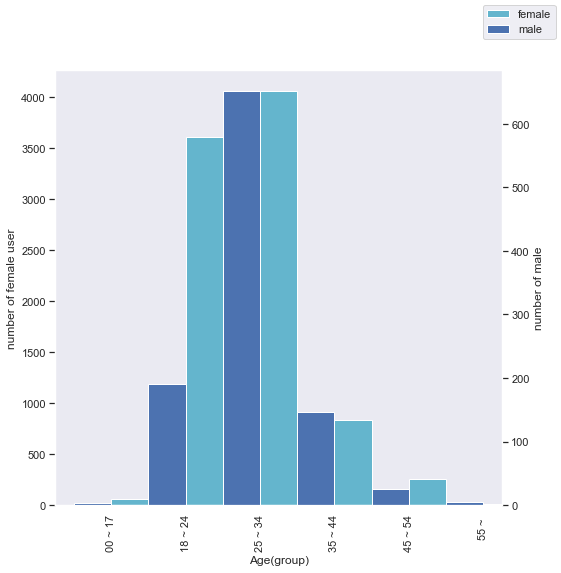

In [265]:
fig, ax0 = plt.subplots(figsize = (8,8))   # figure와 axes 생성하여 create matplotlib
ax1 = ax0.twinx()

ax0.grid(False)
ax1.grid(False)

ax0.set_ylabel ('number of female user')
ax1.set_ylabel('number of male')

plt.grid(False)

graph1 = female['total'].plot( kind="bar",ax = ax0, position = 0, color = 'c', grid = False, label = 'female')
graph2 = male['total'].plot( kind="bar", ax = ax1, position = 1,color = 'b', grid = False, label = 'male')


fig.legend(loc = 'upper right')


## 각 축별로 legend 나타내는 방법  bad practice 인것이 둘이 겹쳐서 나옴

# plt.legend(handles = [graph1, graph2], labels = ('female', 'male'))
# handles, labels = ax0.get_legend_handles_labels()
# ax0.legend(handles, labels)

# handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles, labels)

plt.show()



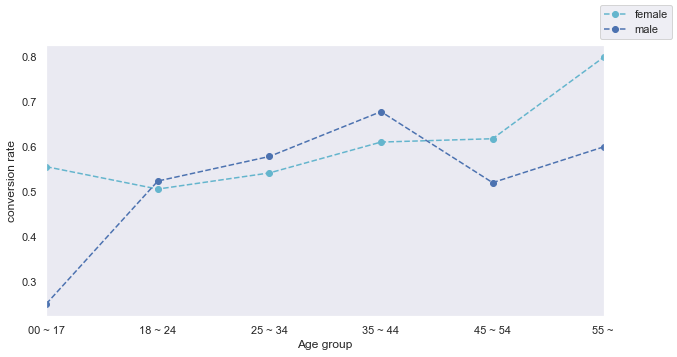

In [266]:
fig, ax = plt.subplots(figsize = (10,5))   # figure와 axes 생성하여 create matplotlib

plt.grid(False)

graph1 = female['conversion rate'].plot( kind="line",ax = ax, marker = 'o', ls = '--', color = 'c', grid = False, label = 'female')
graph2 = male['conversion rate'].plot( kind="line", ax = ax, marker = 'o',ls = '--', color = 'b', grid = False, label = 'male')

fig.legend(loc = 'upper right')

plt.xlabel('Age group')
plt.ylabel('conversion rate')

plt.show()

분석 결과는 다음과 같습니다.

  * 가장 많은 양의 결제가 일어난 구간은 여성 25 ~ 35세입니다. 총 2288개로, 결제 완료의 40% 이상이 이 구간에서 발생했습니다. 심지어 전환율(conversion)도 54.1%로 평균 이상입니다.
  * 또한 어느 정도 모수가 받쳐주는(결제 완료 100회 이상) 채널 중 이보다 전환율이 높은 채널은 1) 여성 36 ~ 54세, 2) 남성 25 ~ 35세, 3) 남성 36 ~ 44세 입니다. 이 채널들은 전환율이 60% 이상으로 매우 높습니다.
  * 다만 이 채널들의 총 결제자(total)가 낮다는 것은 1) 아직 이 마케팅 채널이 최적화가 덜 되었거나, 2) 고객 획득 비용(CAC)이 높은 편이라 마케팅 비용을 늘리지 않았을 가능성이 있습니다. 또한 아주 희소한 경우이지만, 3) 주 마케팅 채널(ex: 페이스북)에 위 채널에 해당하는 고객의 인원수가 부족할 수도 있습니다.

이런 상황에서, 데이터분석가는 퍼포먼스 마케터와 함께 다음의 아이디어를 제시하여 회사의 매출을 증대할 수 있습니다.

  * 마케팅 예산을 여성 36 ~ 54세쪽에 집중한다. 이 채널이 전환율이 높기 때문에, CAC가 여성 25 ~ 35세와 동일하다면 여성 36 ~ 54세에 마케팅 예산을 늘리는 것은 좋은 전략입니다.
  * 여성 36 ~ 54세 채널의 CAC가 상대적으로 높다면, 이 CAC을 낮추는 시도를 합니다. 이 전략이 성공하면 그 후에 마케팅 예산을 집중하는 것도 방법입니다.
  * 현재 이용하고 있는 광고 채널을 다각화하여, 여성 36 ~ 54세가 활동하는 곳에 집중적으로 마케팅 예산을 투입하는 것도 시도해볼만 합니다.

**9. 날짜와 요일 / 시간별 결제 / 캔슬 / 환불 비율을 구해주세요.**

이번에는 시간 정보를 기준으로 결제/캔슬/환불 비율을 알아보겠습니다. 크게 다음의 상황에 따른 구매 여부를 알고 싶습니다.

  1. 시간별 구매 현황(0시 ~ 23시)
  2. 요일별 구매 현황(월요일 ~ 일요일)
  
마케팅팀이 이 정보를 파악할 수 있다면, 1) 전환율이 높은 시기에 마케팅 예산 투입 비중을 줄이고/늘려서 CAC를 낮추거나, 2) 특정 시간대에 눔 코치의 유로 서비스를 아직 구매하지 않은 무료 사용자에게 유료 서비스 구매를 유도하는 메일을 보내서 매출을 늘릴 것입니다.

크게 다음의 내용을 구해주세요.

1. 0시 ~ 23시 사이의 결제/캔슬/환불 비율.
2. 월요일-일요일 사이의 결제/캔슬/환불 비율.

0시 ~ 23시 사이의 결제/캔슬/환불 비율은 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Purchased At(hour)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>0</th>
         <td>236</td>
         <td>344</td>
         <td>26</td>
         <td>606</td>
         <td>0.567657</td>
      </tr>
      <tr>
         <th>1</th>
         <td>156</td>
         <td>207</td>
         <td>28</td>
         <td>391</td>
         <td>0.529412</td>
      </tr>
      <tr>
         <th>2</th>
         <td>90</td>
         <td>97</td>
         <td>4</td>
         <td>191</td>
         <td>0.507853</td>
      </tr>
      <tr>
         <th>3</th>
         <td>58</td>
         <td>66</td>
         <td>5</td>
         <td>129</td>
         <td>0.511628</td>
      </tr>
      <tr>
         <th>4</th>
         <td>59</td>
         <td>45</td>
         <td>7</td>
         <td>111</td>
         <td>0.405405</td>
      </tr>
      <tr>
         <th>5</th>
         <td>36</td>
         <td>47</td>
         <td>6</td>
         <td>89</td>
         <td>0.528090</td>
      </tr>
      <tr>
         <th>6</th>
         <td>48</td>
         <td>70</td>
         <td>6</td>
         <td>124</td>
         <td>0.564516</td>
      </tr>
      <tr>
         <th>7</th>
         <td>80</td>
         <td>114</td>
         <td>20</td>
         <td>214</td>
         <td>0.532710</td>
      </tr>
      <tr>
         <th>8</th>
         <td>171</td>
         <td>264</td>
         <td>29</td>
         <td>464</td>
         <td>0.568966</td>
      </tr>
      <tr>
         <th>9</th>
         <td>162</td>
         <td>239</td>
         <td>36</td>
         <td>437</td>
         <td>0.546911</td>
      </tr>
      <tr>
         <th>10</th>
         <td>208</td>
         <td>323</td>
         <td>38</td>
         <td>569</td>
         <td>0.567663</td>
      </tr>
      <tr>
         <th>11</th>
         <td>212</td>
         <td>263</td>
         <td>27</td>
         <td>502</td>
         <td>0.523904</td>
      </tr>
      <tr>
         <th>12</th>
         <td>205</td>
         <td>235</td>
         <td>36</td>
         <td>476</td>
         <td>0.493697</td>
      </tr>
      <tr>
         <th>13</th>
         <td>205</td>
         <td>286</td>
         <td>41</td>
         <td>532</td>
         <td>0.537594</td>
      </tr>
      <tr>
         <th>14</th>
         <td>192</td>
         <td>253</td>
         <td>20</td>
         <td>465</td>
         <td>0.544086</td>
      </tr>
      <tr>
         <th>15</th>
         <td>187</td>
         <td>231</td>
         <td>14</td>
         <td>432</td>
         <td>0.534722</td>
      </tr>
      <tr>
         <th>16</th>
         <td>187</td>
         <td>235</td>
         <td>26</td>
         <td>448</td>
         <td>0.524554</td>
      </tr>
      <tr>
         <th>17</th>
         <td>180</td>
         <td>246</td>
         <td>26</td>
         <td>452</td>
         <td>0.544248</td>
      </tr>
      <tr>
         <th>18</th>
         <td>194</td>
         <td>260</td>
         <td>20</td>
         <td>474</td>
         <td>0.548523</td>
      </tr>
      <tr>
         <th>19</th>
         <td>163</td>
         <td>269</td>
         <td>36</td>
         <td>468</td>
         <td>0.574786</td>
      </tr>
      <tr>
         <th>20</th>
         <td>184</td>
         <td>236</td>
         <td>22</td>
         <td>442</td>
         <td>0.533937</td>
      </tr>
      <tr>
         <th>21</th>
         <td>231</td>
         <td>329</td>
         <td>32</td>
         <td>592</td>
         <td>0.555743</td>
      </tr>
      <tr>
         <th>22</th>
         <td>248</td>
         <td>332</td>
         <td>41</td>
         <td>621</td>
         <td>0.534622</td>
      </tr>
      <tr>
         <th>23</th>
         <td>318</td>
         <td>409</td>
         <td>44</td>
         <td>771</td>
         <td>0.530480</td>
      </tr>
   </tbody>
</table>

월요일-일요일 사이의 결제/캔슬/환불 비율은 최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th>Status</th>
         <th>cancelled</th>
         <th>completed</th>
         <th>refunded</th>
         <th>total</th>
         <th>conversion</th>
      </tr>
      <tr>
         <th>Purchased At(weekday)</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>Monday</th>
         <td>691</td>
         <td>863</td>
         <td>93</td>
         <td>1647</td>
         <td>0.523983</td>
      </tr>
      <tr>
         <th>Tuesday</th>
         <td>694</td>
         <td>935</td>
         <td>102</td>
         <td>1731</td>
         <td>0.540150</td>
      </tr>
      <tr>
         <th>Wednesday</th>
         <td>679</td>
         <td>953</td>
         <td>90</td>
         <td>1722</td>
         <td>0.553426</td>
      </tr>
      <tr>
         <th>Thursday</th>
         <td>616</td>
         <td>813</td>
         <td>88</td>
         <td>1517</td>
         <td>0.535926</td>
      </tr>
      <tr>
         <th>Friday</th>
         <td>490</td>
         <td>674</td>
         <td>56</td>
         <td>1220</td>
         <td>0.552459</td>
      </tr>
      <tr>
         <th>Saturday</th>
         <td>412</td>
         <td>537</td>
         <td>73</td>
         <td>1022</td>
         <td>0.525440</td>
      </tr>
      <tr>
         <th>Sunday</th>
         <td>428</td>
         <td>625</td>
         <td>88</td>
         <td>1141</td>
         <td>0.547765</td>
      </tr>
   </tbody>
</table>

In [267]:
data.head()

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel,Gender(clean),Height(clean),Age(clean)
Access Code,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others,female,172.0,25.0
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others,male,176.0,26.0
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook,female,171.0,23.0
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver,female,160.0,20.0
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook,female,165.0,28.0


In [275]:
data_hour = data[["Purchased At","Status", "Price"]]
data_hour.head()

,Purchased At,Status,Price
Access Code,,,
Y9RY2VSI,2017-04-14 19:03:29.976,completed,112500
3GTN3S3B,2017-05-23 20:53:54.368,completed,44780
6B0IG276,2017-08-23 23:39:21.840,completed,132000
EMGRU2MO,2017-08-28 20:18:22.824,completed,112500
1ELG96TX,2017-05-07 17:50:30.944,completed,44780


In [276]:
hour_list = []
for i in data["Purchased At"]:
    hour_list.append(i.strftime("%H"))

In [277]:
data_hour["Purchased At(hour)"] = hour_list
data_hour.head()

C:\Users\ysj14\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Purchased At,Status,Price,Purchased At(hour)
Access Code,,,,
Y9RY2VSI,2017-04-14 19:03:29.976,completed,112500,19
3GTN3S3B,2017-05-23 20:53:54.368,completed,44780,20
6B0IG276,2017-08-23 23:39:21.840,completed,132000,23
EMGRU2MO,2017-08-28 20:18:22.824,completed,112500,20
1ELG96TX,2017-05-07 17:50:30.944,completed,44780,17


In [278]:
data_hour.drop(["Purchased At"], axis = 1, inplace = True)
data_hour.head()

,Status,Price,Purchased At(hour)
Access Code,,,
Y9RY2VSI,completed,112500,19
3GTN3S3B,completed,44780,20
6B0IG276,completed,132000,23
EMGRU2MO,completed,112500,20
1ELG96TX,completed,44780,17


In [279]:
data_hour.head()

,Status,Price,Purchased At(hour)
Access Code,,,
Y9RY2VSI,completed,112500,19
3GTN3S3B,completed,44780,20
6B0IG276,completed,132000,23
EMGRU2MO,completed,112500,20
1ELG96TX,completed,44780,17


In [283]:
pivot2 = pd.pivot_table (data_hour, 
                         index = ['Purchased At(hour)'], 
                         columns = 'Status',
                         values = "Price",
                         aggfunc = 'count')

In [285]:
pivot2['total'] = (pivot2.cancelled + pivot2.completed + pivot2.refunded).astype(int)
pivot2['conversion'] = (pivot2.completed / pivot2.total)

In [286]:
pivot2

Status,cancelled,completed,refunded,total,conversion
Purchased At(hour),,,,,
00,236,344,26,606,0.567657
01,156,207,28,391,0.529412
02,90,97,4,191,0.507853
03,58,66,5,129,0.511628
04,59,45,7,111,0.405405
05,36,47,6,89,0.528090
06,48,70,6,124,0.564516
07,80,114,20,214,0.532710
08,171,264,29,464,0.568966


분석 결과는 다음과 같습니다.

  * 아쉽게도, 구매 시간별 전환율(conversion)은 큰 차이가 없어 보입니다, 그 의미는 특정 시간대에 구매한 사용자들이 서비스를 이탈할 확률이 높아지거나 낮아지는 현상은 없다고 볼 수 있습니다.
  * 다만 전환율과는 별개로, 주로 점심시간(10시 ~ 12시)나 새벽(23시 ~ 24시)에 구매량이 대폭 늘어난다는 것을 알 수 있습니다. 만일 광고 예산을 집행한다면 이 시기에 집중적으로 집행하거나, 무료 사용자에게 유료 사용자로 전환을 유도하는 이메일을 보냄으로써 전환율을 높이는 것은 시도해볼만 합니다.

월요일-일요일 사이의 결제/캔슬/환불 비율은 다음의 방식으로 구할 수 있습니다.

In [358]:
data_week = data[["Purchased At","Status", "Price"]]
data_week.head()

,Purchased At,Status,Price
Access Code,,,
Y9RY2VSI,2017-04-14 19:03:29.976,completed,112500
3GTN3S3B,2017-05-23 20:53:54.368,completed,44780
6B0IG276,2017-08-23 23:39:21.840,completed,132000
EMGRU2MO,2017-08-28 20:18:22.824,completed,112500
1ELG96TX,2017-05-07 17:50:30.944,completed,44780


In [359]:
week_day_list = []

for i in data["Purchased At"]:
    date_time_obj = datetime.datetime.strptime(i.strftime("%y-%m-%d"), '%y-%m-%d').weekday()
    if date_time_obj == 0:
        week_day_list.append("Monday")
    elif date_time_obj == 1:
        week_day_list.append("Tuesday")
    elif date_time_obj == 2:
        week_day_list.append("Wednesday")
    elif date_time_obj == 3:
        week_day_list.append("Thursday")
    elif date_time_obj == 4:
        week_day_list.append("Friday")
    elif date_time_obj == 5:
        week_day_list.append("Saturday")
    else:
        week_day_list.append("Sunday")

In [360]:
data_week["Purchased At(weekday)"] = week_day_list
data_week.head()

C:\Users\ysj14\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Purchased At,Status,Price,Purchased At(weekday)
Access Code,,,,
Y9RY2VSI,2017-04-14 19:03:29.976,completed,112500,Friday
3GTN3S3B,2017-05-23 20:53:54.368,completed,44780,Tuesday
6B0IG276,2017-08-23 23:39:21.840,completed,132000,Wednesday
EMGRU2MO,2017-08-28 20:18:22.824,completed,112500,Monday
1ELG96TX,2017-05-07 17:50:30.944,completed,44780,Sunday


In [361]:
pivot3 = pd.pivot_table (data_week, 
                         index = ['Purchased At(weekday)'], 
                         columns = 'Status',
                         values = "Price",
                         aggfunc = 'count')

In [362]:
pivot3['total'] = (pivot3.cancelled + pivot3.completed + pivot3.refunded).astype(int)
pivot3['conversion'] = (pivot3.completed / pivot3.total)

In [364]:
pivot3

Status,cancelled,completed,refunded,total,conversion
Purchased At(weekday),,,,,
Friday,490,674,56,1220,0.552459
Monday,691,863,93,1647,0.523983
Saturday,412,537,73,1022,0.525440
Sunday,428,625,88,1141,0.547765
Thursday,616,813,88,1517,0.535926
Tuesday,694,935,102,1731,0.540150
Wednesday,679,953,90,1722,0.553426


분석 결과는 다음과 같습니다.

  * 구매 시간과 마찬가지로, 구매 요일별 전환율(conversion)은 큰 차이가 없어 보입니다. 어느 요일이나 마찬가지로, 구매한 사람이 서비스를 이탈하거나 남을 확률은 거의 동일합니다.
  * 하지만 사용자들은 전반적으로 주말(금-일)이 다가올수록 구매를 덜 하게되고, 주중(월-수)이 다가올수록 구매를 많이 하게 되는 현상을 발견할 수 있습니다. 이 시기에 광고 예산을 크게 집행하거나, 구매를 유도하는 메일이나 모바일 노티피케이션을 보내는 것은 좋은 아이디어입니다.